# Intelligent Agents: Reflex-Based Agents for the Vacuum-cleaner World


## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file. 

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

**CAGATAY DUYGU**



**48369962**


__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.


## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty. ([Help with random numbers and arrays in Python](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/random_numbers_and_arrays.ipynb))
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. **Use the same environmnt for all your agent implementations in the tasks below.**

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

## Simple Environment Matrix:
0: clean points,
1:dirty points,
3:walls,
2:obstacles

Environment Matrix is defined randomly. Without obstacle situation, all matrix is defined 1,0 values inside and 3 values on the wall.

## Randomized Agent with displacement values.

In [ ]:
import numpy as np

#delta represents the displacement value. for every action, displacement value is changed

def simple_randomized_agent():
    actions = ["north", "east", "west", "south", "suck"]
    chosen_Act = np.random.choice(actions)
    if chosen_Act == 'north':
        delta = [-1,0]
    if chosen_Act == 'east':
        delta = [0,1]
    if chosen_Act == 'west':
        delta = [0,-1]
    if chosen_Act == 'south':
        delta = [1,0]  
    if chosen_Act == 'suck':
        delta = [0,0]
    return np.array(delta), chosen_Act

## Simple Environment Randomized Agent

0: Clean points
1: Dirty Points
2:Obstacles
3:Walls



In [ ]:

def simple_environment(n,agent, max_steps, bumpers = {"north" : False, "east" : False, "south" : False, "west" : False, "dirt" : False }):
    robot_position = np.random.choice([i for i in range(1,n-1)], size=(1, 2))[0]
    environment=np.random.choice(2, size=(n, n), p=[0.8, 0.2])
    #value 2 should be replaced to 3 if there is any obstacle in the environment and another possibility value should be added.
    
    #3 represents the walls. First and last column and rows of the environment matrix will be all 3.
    environment[0] = [3 for i in range(n)]
    environment[n-1] = [3 for i in range(n)]
    environment[:,0] = [3 for i in range(n)]
    environment[:,n-1]=[3 for i in range(n)]

    
    for i in range(max_steps): 
      #Defines sensors for the environment. Bumpers will see the walls(3) and obstacles(2) if there is any.
      #This case there are only walls. Dirt sensor is defined inside bumpers matrix and represented
      #as one 
        if robot_position[0] == n-2: bumpers["south"] = True
        if robot_position[0] != n-2: bumpers["south"] = False 
        if robot_position[1] == n-2: bumpers["east"] = True
        if robot_position[1] != n-2: bumpers["east"] = False
        if robot_position[1] == 1: bumpers["west"] = True
        if robot_position[1] != 1: bumpers["west"] = False
        if robot_position[0] == 1: bumpers["north"] = True
        if robot_position[0] != 1: bumpers["north"] = False
        if environment[robot_position[0]-1][robot_position[1]]==2:bumpers["north"]=True
        if environment[robot_position[0]][robot_position[1]+1]==2:bumpers["east"]=True
        if environment[robot_position[0]+1][robot_position[1]]==2:bumpers["south"]=True
        if environment[robot_position[0]][robot_position[1]-1]==2:bumpers["north"]=True
        if environment[robot_position[0]][robot_position[1]]==1: bumpers["dirt"]=True
        if environment[robot_position[0]][robot_position[1]]==0: bumpers["dirt"]=False
        delta, act = agent()
        #print(robot_position, act)
        if act=='suck':
           environment[robot_position[0]][robot_position[1]]=0
        else:
           environment=environment
        if (bumpers["north"] == True) and (act == 'north'):
            robot_position = robot_position
        elif (bumpers["south"] == True) and (act == 'south'):
            robot_position = robot_position
        elif (bumpers["east"] == True) and (act == 'east'):
            robot_position = robot_position 
        elif (bumpers["west"] == True) and (act == 'west'):
            robot_position = robot_position 
        else:
            robot_position = robot_position + delta
      
        print("Number of iteration:")
        print(i+1)
        print("position of robot:")
        print(robot_position)
        print("Action taken:")
        print(act)
        print("Environment status after the action")
        print(environment)
        print(bumpers)
        #if the environment is clean, break the loop.
        if 1 not in environment:
            break
#returns the total action required.
    return i+1

In [ ]:
import numpy as np
n=7
simple_environment(n,simple_randomized_agent, max_steps = 5)


Number of iteration:
1
position of robot:
[3 2]
Action taken:
suck
Environment status after the action
[[3 3 3 3 3 3 3]
 [3 0 1 0 0 0 3]
 [3 0 0 0 1 1 3]
 [3 0 0 1 0 1 3]
 [3 0 0 0 0 0 3]
 [3 1 0 1 0 1 3]
 [3 3 3 3 3 3 3]]
{'north': False, 'east': False, 'south': False, 'west': False, 'dirt': False}
Number of iteration:
2
position of robot:
[3 1]
Action taken:
west
Environment status after the action
[[3 3 3 3 3 3 3]
 [3 0 1 0 0 0 3]
 [3 0 0 0 1 1 3]
 [3 0 0 1 0 1 3]
 [3 0 0 0 0 0 3]
 [3 1 0 1 0 1 3]
 [3 3 3 3 3 3 3]]
{'north': False, 'east': False, 'south': False, 'west': False, 'dirt': False}
Number of iteration:
3
position of robot:
[3 1]
Action taken:
west
Environment status after the action
[[3 3 3 3 3 3 3]
 [3 0 1 0 0 0 3]
 [3 0 0 0 1 1 3]
 [3 0 0 1 0 1 3]
 [3 0 0 0 0 0 3]
 [3 1 0 1 0 1 3]
 [3 3 3 3 3 3 3]]
{'north': False, 'east': False, 'south': False, 'west': True, 'dirt': False}
Number of iteration:
4
position of robot:
[3 1]
Action taken:
west
Environment status after the ac

5

## Task 2:  Implement a simple reflex agent [10 Points] 

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function.

Obstacle moved around randomly. It does not suck randomly. If it detects dirt in its position, it cleans the dirt. If it gets positive value in its bumpers sensors, it removes the action from its potential actions and select an action from its potential actions randomly

In [ ]:
import numpy as np

In [ ]:
# Your code and description goes here

def simple_agent(sensor):
    actions = ["north", "east", "west", "south"]
    chosen_Act = np.random.choice(actions)
    
    # ACTION REMOVAL
    if (chosen_Act == 'north') and (sensor["north"]==True):
        actions.remove('north')
        chosen_Act = np.random.choice(actions)
    if chosen_Act == 'north' and (sensor["north"]==False): chosen_Act='north'

    if (chosen_Act == 'east') and (sensor["east"]==True):
        actions.remove('east')
        chosen_Act = np.random.choice(actions)
    if chosen_Act == 'east' and (sensor["east"]==False): chosen_Act='east'        

    if (chosen_Act == 'south') and (sensor["south"]==True):
        actions.remove('south')
        chosen_Act = np.random.choice(actions)
    if chosen_Act == 'south' and (sensor["south"]==False): chosen_Act='south' 

    if (chosen_Act == 'west') and (sensor["west"]==True):
        actions.remove('west')
        chosen_Act = np.random.choice(actions)
    if chosen_Act == 'west' and (sensor["west"]==False): chosen_Act='west' 

    if sensor["dirt"]==True: chosen_Act='suck'

    return chosen_Act



In [ ]:
#SIMPLE ENVIRONMENT IS FOR REFLEX AGENT IS DEFINED:
def simple_environment_2(n,agent, max_steps, bumpers = {"north" : False, "east" : False, "south" : False, "west" : False, "dirt" : False }):
    robot_position = np.random.choice([i for i in range(1,n-1)], size=(1, 2))[0]
    environment=np.random.choice(2, size=(n, n), p=[0.8, 0.2])
    environment[0] = [3 for i in range(n)]
    environment[n-1] = [3 for i in range(n)]
    environment[:,0] = [3 for i in range(n)]
    environment[:,n-1]=[3 for i in range(n)]
    #print("First Position of the robot:")
    #print(robot_position)
  #print(robot_position)
   # south_con, north_con, west_con, east_con = robot_position[0] == 4, 
    
    for i in range(max_steps): 
      #define environmental obstacles. For this case, bumpers will only see the
      #walls. Dirt sensor is also defined here.
        #reward_space[robot_position[0]+1][robot_position[1]+1]=reward_space[robot_position[0]][robot_position[1]]+1
        if robot_position[0] == n-2: bumpers["south"] = True
        if robot_position[0] != n-2: bumpers["south"] = False 
        if robot_position[1] == n-2: bumpers["east"] = True
        if robot_position[1] != n-2: bumpers["east"] = False
        if robot_position[1] == 1: bumpers["west"] = True
        if robot_position[1] != 1: bumpers["west"] = False
        if robot_position[0] == 1: bumpers["north"] = True
        if robot_position[0] != 1: bumpers["north"] = False
        if environment[robot_position[0]-1][robot_position[1]]==2:bumpers["north"]=True
        if environment[robot_position[0]][robot_position[1]+1]==2:bumpers["east"]=True
        if environment[robot_position[0]+1][robot_position[1]]==2:bumpers["south"]=True
        if environment[robot_position[0]][robot_position[1]-1]==2:bumpers["north"]=True


        if environment[robot_position[0]][robot_position[1]]==1: bumpers["dirt"]=True
        if environment[robot_position[0]][robot_position[1]]==0: bumpers["dirt"]=False
        act = agent(bumpers)
        if act == 'east':
          delta = [0,1]
        if act == 'west':
          delta = [0,-1]
        if act == 'south':
          delta = [1,0]  
        if act == 'suck':
          delta = [0,0]
        if act == 'north':
          delta = [-1,0]
        #print(robot_position, act)
        if act=='suck':
           environment[robot_position[0]][robot_position[1]]=0
        else:
           environment=environment
        if (bumpers["north"] == True) and (act == 'north'):
            robot_position = robot_position
        elif (bumpers["south"] == True) and (act == 'south'):
            robot_position = robot_position
        elif (bumpers["east"] == True) and (act == 'east'):
            robot_position = robot_position 
        elif (bumpers["west"] == True) and (act == 'west'):
            robot_position = robot_position 
        else:
            robot_position = robot_position + delta
      
        print("Number of iteration:")
        print(i+1)
        print(bumpers)
        print("Action taken:")
        print(act)
        print("position of robot:")
        print(robot_position)
        print("Environment status after the action")
        print(environment)
        
        #print(reward_space)
        #if the environment is clean, break the loop.
        if 1 not in environment:
            break
        
    return i+1

In [ ]:
import numpy as np
n=7
simple_environment_2(n,simple_agent, max_steps = 3)


Number of iteration:
1
{'north': True, 'east': False, 'south': False, 'west': False, 'dirt': True}
Action taken:
suck
position of robot:
[1 4]
Environment status after the action
[[3 3 3 3 3 3 3]
 [3 0 0 0 0 1 3]
 [3 0 0 0 0 0 3]
 [3 0 0 0 0 0 3]
 [3 0 0 1 1 0 3]
 [3 0 0 0 1 0 3]
 [3 3 3 3 3 3 3]]
Number of iteration:
2
{'north': True, 'east': False, 'south': False, 'west': False, 'dirt': False}
Action taken:
south
position of robot:
[2 4]
Environment status after the action
[[3 3 3 3 3 3 3]
 [3 0 0 0 0 1 3]
 [3 0 0 0 0 0 3]
 [3 0 0 0 0 0 3]
 [3 0 0 1 1 0 3]
 [3 0 0 0 1 0 3]
 [3 3 3 3 3 3 3]]
Number of iteration:
3
{'north': False, 'east': False, 'south': False, 'west': False, 'dirt': False}
Action taken:
west
position of robot:
[2 3]
Environment status after the action
[[3 3 3 3 3 3 3]
 [3 0 0 0 0 1 3]
 [3 0 0 0 0 0 3]
 [3 0 0 0 0 0 3]
 [3 0 0 1 1 0 3]
 [3 0 0 0 1 0 3]
 [3 3 3 3 3 3 3]]


3

## Task 3: Implement a model-based reflex agent [20 Points]

Model-based agents use a state to keep track of what they have done and perceived so far. Your agent needs to find out where it is located and then keep track of its current location. You also need a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

Describe how you define the __agent state__ and how your agent works before implementing it. ([Help with implementing state information on Python](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/store_agent_state_information.ipynb))

**Firstly, robot goes to North-West corner.**

**When these two sensor is True, robot know that its position is [1,1]**

**A negative reward matrix is defined from robot location.**

**Reward space is an array and it is all zeros in the beginning.**

**Robot position is reward space is added 1 every iteration.**

**Every iteration, robot looks at if there is dirt in its location. If there is it cleans the dirt.**

**If there is no dirt, it looks at its neigbor's reward space equivalent. It selects the minimum value and take the action accordingly.**

**If there are same values more than 1, agent selects the action randomly.**

In [ ]:
import numpy as np

In [ ]:
# Your code and description goes here

def find_station(n,robot_position,max_steps):
    chosen_Act = 'north'
    for i in range(max_steps):
        # sensors sensing
        if robot_position[0] == n-2: bumpers["south"] = True
        if robot_position[0] != n-2: bumpers["south"] = False 
        if robot_position[1] == n-2: bumpers["east"] = True
        if robot_position[1] != n-2: bumpers["east"] = False
        if robot_position[1] == 1: bumpers["west"] = True
        if robot_position[1] != 1: bumpers["west"] = False
        if robot_position[0] == 1: bumpers["north"] = True
        if robot_position[0] != 1: bumpers["north"] = False
        # rationalizing action
        if bumpers[chosen_Act] == True: 
            chosen_Act = 'west' 
        else: 
            chosen_Act = chosen_Act
        if bumpers[chosen_Act] == True:
            #print('arrived at north-west corner')
            #print('saving position as (0,0) to memory')
            memory_position = robot_position
            break
        # act upon chosen action
        if chosen_Act == 'east':
            delta = [0,1]
        if chosen_Act == 'west':
            delta = [0,-1]
        if chosen_Act == 'south':
            delta = [1,0]  
        if chosen_Act == 'suck':
            delta = [0,0]
        if chosen_Act == 'north':
            delta = [-1,0]         
        # changed position
        robot_position = robot_position + delta
        #print(robot_position)
    return robot_position

#Look at the reward values and select minimum value and its act.
def reward_based_movement(robot_position, reward_space, actions):
    # robot_position = [0, 0]
    # actions = {"east" : [0,1], "south" : [1,0]}
    p_pos, p_reward = list(), list()
    p_delta = [j for i,j in actions.items()]
    for i in range(len(p_delta)):
        p_pos.append(np.array(robot_position) + p_delta[i])
        p_reward.append(reward_space[p_pos[-1][0]][p_pos[-1][1]])
    idx = p_reward.index(min(p_reward)) # find index of the low reward direction
    act = list(actions.keys())[idx]
    #print(chosen_Act) 
    #print(reward_space)
    return act

def modal_based_agent(n, robot_position, max_steps):
    env=np.random.choice(2, size=(n, n), p=[0.8, 0.2])
    env[0] = [3 for i in range(n)]
    env[n-1] = [3 for i in range(n)]
    env[:,0] = [3 for i in range(n)]
    env[:,n-1]=[3 for i in range(n)]
    robot_position_array = list()
    reward_space = np.zeros(shape = (n,n))
    #print('This is the environment matrix:')
    #print(env)
    for i in range(max_steps):
        # return back all possiblities.
        actions = {"north" : [-1,0] , "east": [0,1], "west" : [0,-1], "south" : [1, 0]}
        reward_space[robot_position[0]][robot_position[1]]=reward_space[robot_position[0]][robot_position[1]]+1
        #print(robot_position)
        # sensors
        if robot_position[0] == n-2: bumpers["south"] = True
        if robot_position[0] != n-2: bumpers["south"] = False 
        if robot_position[1] == n-2: bumpers["east"] = True
        if robot_position[1] != n-2: bumpers["east"] = False
        if robot_position[1] == 1: bumpers["west"] = True
        if robot_position[1] != 1: bumpers["west"] = False
        if robot_position[0] == 1: bumpers["north"] = True
        if robot_position[0] != 1: bumpers["north"] = False

       
        # Obstacle recognition  
        if env[robot_position[0]-1][robot_position[1]]==2:bumpers["north"]=True
        if env[robot_position[0]][robot_position[1]+1]==2:bumpers["east"]=True
        if env[robot_position[0]+1][robot_position[1]]==2:bumpers["south"]=True
        if env[robot_position[0]][robot_position[1]-1]==2:bumpers["west"]=True
        if env[robot_position[0]][robot_position[1]]==1: bumpers["suck"]=True
        if env[robot_position[0]][robot_position[1]]==0: bumpers["suck"]=False
      
        
        # eliminate irrational choices to determine the action:         
        if bumpers["suck"] == True: 
            chosen_Act = 'suck'
            #print('sucking')
        else:
            if bumpers['south'] ==  True: del actions['south']  # actions.remove('south')
            if bumpers['east'] ==  True:  del actions['east']   # actions.remove('east')
            if bumpers['west'] ==  True:  del actions['west']   # actions.remove('west')
            if bumpers['north'] ==  True: del actions['north']  # actions.remove('north')
        
        # Choosing rational action        
            if i == 0: 
                chosen_Act = np.random.choice(list(actions.keys()))
                #print('first step')  # first action is total random chosen from possible paths.
            elif bumpers[chosen_Act] == True: 
                #print('we are at wall: ',robot_position)
                chosen_Act = reward_based_movement(robot_position,reward_space, actions) #reward_based_movement
            elif chosen_Act == 'suck': 
                #print(actions)
                chosen_Act = reward_based_movement(robot_position,reward_space, actions)
                #print('cleaned: ', robot_position)
            else: 
                chosen_Act = reward_based_movement(robot_position,reward_space, actions)
                #print('else condition. pure reward based')
            
        
        # act to the chosen action
        if chosen_Act == 'east':
            delta = [0,1]
        if chosen_Act == 'west':
            delta = [0,-1]
        if chosen_Act == 'south':
            delta = [1,0]  
        if chosen_Act == 'suck':
            delta = [0,0]
        if chosen_Act == 'north':
            delta = [-1,0]            
        if chosen_Act == 'suck':
            env[robot_position[0]][robot_position[1]]=0
        else:
            env=env

        #if the environment is clean, break the loop.
        #if not np.any(env):
        if 1 not in env:
            print('finished at iteration:', i+1,'steps')
            break
        
        # Moving to new position
        robot_position = robot_position + delta
        robot_position_array.append(robot_position)
        print('iteration')
        print(i+1)
        print("Reward Space")
        print(reward_space) 
        print("Environment")
        print(env)
        
    return i+1, reward_space          

In [ ]:
n=7 
bumpers = {"north" : False, "east" : False, "south" : False, "west" : False, "dirt" : False }
robot_position = np.random.choice([i for i in range(1,n-1)], size=(1, 2))[0]
robot_position = find_station(n,robot_position,1000000)
modal_based_agent(n,robot_position, 10)

iteration
1
Reward Space
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
Environment
[[3 3 3 3 3 3 3]
 [3 0 1 0 1 0 3]
 [3 1 0 0 0 0 3]
 [3 0 0 1 0 1 3]
 [3 0 1 0 0 0 3]
 [3 0 0 0 0 0 3]
 [3 3 3 3 3 3 3]]
iteration
2
Reward Space
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
Environment
[[3 3 3 3 3 3 3]
 [3 0 1 0 1 0 3]
 [3 0 0 0 0 0 3]
 [3 0 0 1 0 1 3]
 [3 0 1 0 0 0 3]
 [3 0 0 0 0 0 3]
 [3 3 3 3 3 3 3]]
iteration
3
Reward Space
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
Environment
[[3 3 3 3 3 3 3]
 [3 0 1 0 1 0 3]
 [3 0 0 0 0 0 3]
 [3 0 0 1 0 1 3]
 [3 0 1 0 0 0 3]
 [3 0 0 0 0 0 3]
 [3 3 3 3 3 3 3]]
iteration
4
Reward Spa

(10, array([[0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 2., 1., 2., 1., 0.],
        [0., 2., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]]))

## Task 4: Simulation study [30 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. E.g., $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each. Present the results using tables and graphs. Discuss the differences between the agents. 
([Help with charts and tables in Python](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/charts_and_tables.ipynb))

In [ ]:
# Your code goes here

In [ ]:
import numpy as np

### Random agent

In [ ]:
#DEFINE SIMPLE ENVIRONMENT AGAIN WITHOUT PRINTING ANY VALUES
def simple_environment(n,agent, max_steps, bumpers = {"north" : False, "east" : False, "south" : False, "west" : False, "dirt" : False }):
    robot_position = np.random.choice([i for i in range(1,n-1)], size=(1, 2))[0]
    environment=np.random.choice(2, size=(n, n), p=[0.8, 0.2])
    environment[0] = [3 for i in range(n)]
    environment[n-1] = [3 for i in range(n)]
    environment[:,0] = [3 for i in range(n)]
    environment[:,n-1]=[3 for i in range(n)]
    #print("First Position of the robot:")
    #print(robot_position)
    #print(robot_position)
    # south_con, north_con, west_con, east_con = robot_position[0] == 4, 
    
    for i in range(max_steps): 
      #define environmental obstacles. For this case, bumpers will only see the
      #walls. Dirt sensor is also defined here.
        if robot_position[0] == n-2: bumpers["south"] = True
        if robot_position[0] != n-2: bumpers["south"] = False 
        if robot_position[1] == n-2: bumpers["east"] = True
        if robot_position[1] != n-2: bumpers["east"] = False
        if robot_position[1] == 1: bumpers["west"] = True
        if robot_position[1] != 1: bumpers["west"] = False
        if robot_position[0] == 1: bumpers["north"] = True
        if robot_position[0] != 1: bumpers["north"] = False
        if environment[robot_position[0]-1][robot_position[1]]==2:bumpers["north"]=True
        if environment[robot_position[0]][robot_position[1]+1]==2:bumpers["east"]=True
        if environment[robot_position[0]+1][robot_position[1]]==2:bumpers["south"]=True
        if environment[robot_position[0]][robot_position[1]-1]==2:bumpers["north"]=True
        delta, act = agent()
        #print(robot_position, act)
        if act=='suck':
           environment[robot_position[0]][robot_position[1]]=0
        else:
           environment=environment
        if (bumpers["north"] == True) and (act == 'north'):
            robot_position = robot_position
        elif (bumpers["south"] == True) and (act == 'south'):
            robot_position = robot_position
        elif (bumpers["east"] == True) and (act == 'east'):
            robot_position = robot_position 
        elif (bumpers["west"] == True) and (act == 'west'):
            robot_position = robot_position 
        else:
            robot_position = robot_position + delta
      
        #print("Number of iteration:")
        #print(i+1)
        #print("position of robot:")
        #print(robot_position)
        #print("Action taken:")
        #print(act)
        #print("Environment status after the action")
        #print(environment)
        #print(bumpers)
        #if the environment is clean, break the loop.
        if 1 not in environment:
            break

    return i+1


5x5 Environment for Random Agent







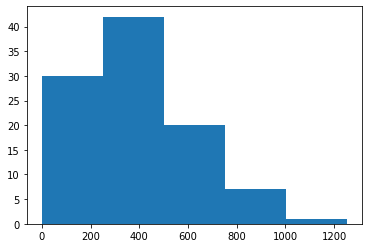

mean value for number of iterations:


400.16

In [ ]:
import matplotlib.pyplot as plt
step_size_random=list()
n=7
for i in range(100):
    step=simple_environment(n,simple_randomized_agent, max_steps = 1500)
    #print(step)
    step_size_random.append(step)
step_size_reflex = [i for i in step_size_random if i < 999999999999999999]
plt.hist(step_size_random, bins=5)
plt.show()

print('mean value for number of iterations:')
np.mean(step_size_random)

10x10 Environment for Random Agent

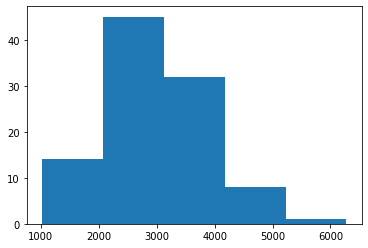

mean value for number of iterations:


2982.32

In [ ]:
import matplotlib.pyplot as plt
step_size_random=list()
n=12
for i in range(100):
    step=simple_environment(n,simple_randomized_agent, max_steps = 100000)
    #print(step)
    step_size_random.append(step)
step_size_reflex = [i for i in step_size_random if i < 999999999999999999]
plt.hist(step_size_random, bins=5)
plt.show()

print('mean value for number of iterations:')
np.mean(step_size_random)

100x100 Environment for Random Agent

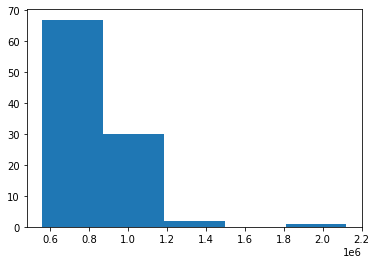

mean value for number of iterations:


841031.62

In [ ]:
import matplotlib.pyplot as plt
step_size_random=list()
n=102
for i in range(100):
    step=simple_environment(n,simple_randomized_agent, max_steps = 10000000)
    #print(step)
    step_size_random.append(step)
step_size_reflex = [i for i in step_size_random if i < 999999999999999999]
plt.hist(step_size_random, bins=5)
plt.show()

print('mean value for number of iterations:')
np.mean(step_size_random)

### SIMPLE ENVIRONMENT FOR REFLEX AGENT

In [ ]:
#SIMPLE ENVIRONMENT IS DEFINED AGAIN WITHOUT PRINTING ANY VALUES.
def simple_environment_2(n,agent, max_steps, bumpers = {"north" : False, "east" : False, "south" : False, "west" : False, "dirt" : False }):
    robot_position = np.random.choice([i for i in range(1,n-1)], size=(1, 2))[0]
    environment=np.random.choice(2, size=(n, n), p=[0.8, 0.2])
    environment[0] = [3 for i in range(n)]
    environment[n-1] = [3 for i in range(n)]
    environment[:,0] = [3 for i in range(n)]
    environment[:,n-1]=[3 for i in range(n)]
    #print("First Position of the robot:")
    #print(robot_position)
  #print(robot_position)
   # south_con, north_con, west_con, east_con = robot_position[0] == 4, 
    
    for i in range(max_steps): 
      #define environmental obstacles. For this case, bumpers will only see the
      #walls. Dirt sensor is also defined here.
        #reward_space[robot_position[0]+1][robot_position[1]+1]=reward_space[robot_position[0]][robot_position[1]]+1
        if robot_position[0] == n-2: bumpers["south"] = True
        if robot_position[0] != n-2: bumpers["south"] = False 
        if robot_position[1] == n-2: bumpers["east"] = True
        if robot_position[1] != n-2: bumpers["east"] = False
        if robot_position[1] == 1: bumpers["west"] = True
        if robot_position[1] != 1: bumpers["west"] = False
        if robot_position[0] == 1: bumpers["north"] = True
        if robot_position[0] != 1: bumpers["north"] = False
        if environment[robot_position[0]-1][robot_position[1]]==2:bumpers["north"]=True
        if environment[robot_position[0]][robot_position[1]+1]==2:bumpers["east"]=True
        if environment[robot_position[0]+1][robot_position[1]]==2:bumpers["south"]=True
        if environment[robot_position[0]][robot_position[1]-1]==2:bumpers["north"]=True


        if environment[robot_position[0]][robot_position[1]]==1: bumpers["dirt"]=True
        if environment[robot_position[0]][robot_position[1]]==0: bumpers["dirt"]=False
        act = agent(bumpers)
        if act == 'east':
          delta = [0,1]
        if act == 'west':
          delta = [0,-1]
        if act == 'south':
          delta = [1,0]  
        if act == 'suck':
          delta = [0,0]
        if act == 'north':
          delta = [-1,0]
        #print(robot_position, act)
        if act=='suck':
           environment[robot_position[0]][robot_position[1]]=0
        else:
           environment=environment
        if (bumpers["north"] == True) and (act == 'north'):
            robot_position = robot_position
        elif (bumpers["south"] == True) and (act == 'south'):
            robot_position = robot_position
        elif (bumpers["east"] == True) and (act == 'east'):
            robot_position = robot_position 
        elif (bumpers["west"] == True) and (act == 'west'):
            robot_position = robot_position 
        else:
            robot_position = robot_position + delta
      
        #print("Number of iteration:")
        #print(i+1)
        #print(bumpers)
        #print("Action taken:")
        #print(act)
        #print("position of robot:")
        #print(robot_position)
        #print("Environment status after the action")
        #print(environment)
        
        #print(reward_space)
        #if the environment is clean, break the loop.
        if 1 not in environment:
            break
        
    return i+1

CODE BELOW RETURNS THE NUMBER OF ITERATION NEEDED FOR ROBOT CLEAN THE ENVIRONMENT. 

In [ ]:
import numpy as np
n=7
simple_environment_2(n,simple_agent, max_steps = 500)


72

Simple Reflex Agent 5X5 Environment

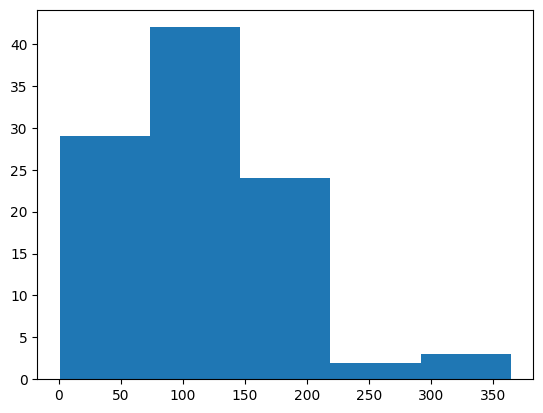

mean value for number of iterations:


114.2

In [ ]:
import matplotlib.pyplot as plt
step_size=list()
n=7
for i in range(100):
    step=simple_environment_2(n,simple_agent, max_steps = 500)
    #print(step)
    step_size.append(step)
step_size_reflex = [i for i in step_size if i < 999999999999999999]
plt.hist(step_size, bins=5)
plt.show()

print('mean value for number of iterations:')
np.mean(step_size)

Simple Reflex Agent 10x10 Environment

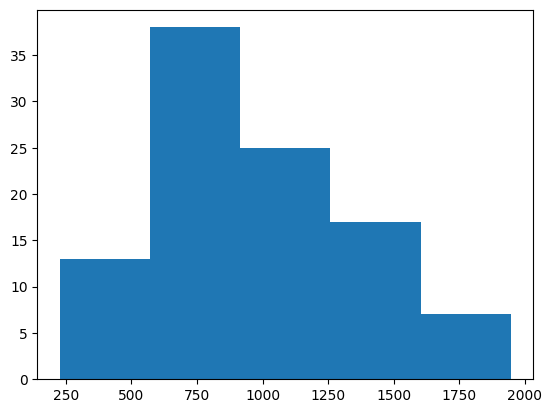

mean value for number of iterations:


958.23

In [ ]:
import matplotlib.pyplot as plt
step_size=list()
n=12
for i in range(100):
    step=simple_environment_2(n,simple_agent, max_steps = 3000)
    #print(step)
    step_size.append(step)
step_size_reflex = [i for i in step_size if i < 999999999999999999]
plt.hist(step_size, bins=5)
plt.show()

print('mean value for number of iterations:')
np.mean(step_size)

Simple Reflex Agent 100x100 Environment

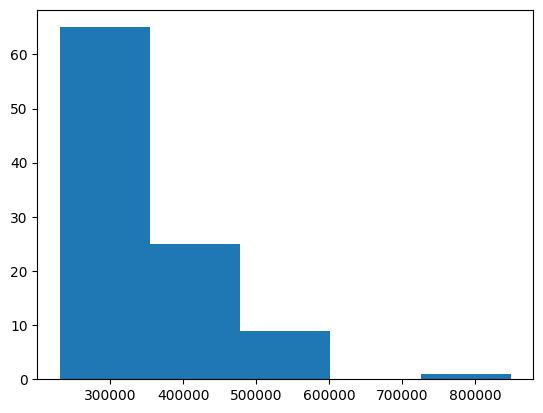

mean value for number of iterations:


349550.73

In [ ]:
import matplotlib.pyplot as plt
step_size=list()
n=102
for i in range(100):
    step=simple_environment_2(n,simple_agent, max_steps = 1000000)
    #print(step)
    step_size.append(step)
step_size_reflex = [i for i in step_size if i < 1000000]
plt.hist(step_size, bins=5)
plt.show()

print('mean value for number of iterations:')
np.mean(step_size)

### Model Based Agent

## model based without obstacle 5x5 environment:

In [ ]:
import numpy as np

In [ ]:
# Your code and description goes here

def find_station(n,robot_position,max_steps):
    chosen_Act = 'north'
    for i in range(max_steps):
        # sensors sensing
        if robot_position[0] == n-2: bumpers["south"] = True
        if robot_position[0] != n-2: bumpers["south"] = False 
        if robot_position[1] == n-2: bumpers["east"] = True
        if robot_position[1] != n-2: bumpers["east"] = False
        if robot_position[1] == 1: bumpers["west"] = True
        if robot_position[1] != 1: bumpers["west"] = False
        if robot_position[0] == 1: bumpers["north"] = True
        if robot_position[0] != 1: bumpers["north"] = False
        # rationalizing action
        if bumpers[chosen_Act] == True: 
            chosen_Act = 'west' 
        else: 
            chosen_Act = chosen_Act
        if bumpers[chosen_Act] == True:
            #print('arrived at north-west corner')
            #print('saving position as (0,0) to memory')
            memory_position = robot_position
            break
        # act upon chosen action
        if chosen_Act == 'east':
            delta = [0,1]
        if chosen_Act == 'west':
            delta = [0,-1]
        if chosen_Act == 'south':
            delta = [1,0]  
        if chosen_Act == 'suck':
            delta = [0,0]
        if chosen_Act == 'north':
            delta = [-1,0]         
        # changed position
        robot_position = robot_position + delta
        #print(robot_position)
    return robot_position

#env = np.random.choice(2, size=(n-2, n-2), p=[0.8, 0.2])

def reward_based_movement(robot_position, reward_space, actions):
    # put this after possible actions are determined by bumpers!
    # robot_position = [0, 0]
    # actions = {"east" : [0,1], "south" : [1,0]}
    p_pos, p_reward = list(), list()
    p_delta = [j for i,j in actions.items()]
    for i in range(len(p_delta)):
        p_pos.append(np.array(robot_position) + p_delta[i])
        p_reward.append(reward_space[p_pos[-1][0]][p_pos[-1][1]])
    idx = p_reward.index(min(p_reward)) # find index of the low reward direction
    act = list(actions.keys())[idx]
    #print(chosen_Act) 
    #print(reward_space)
    return act

def modal_based_agent(n, robot_position, max_steps):
    #env = np.random.choice(3, size=(7, 7), p=[0.8, 0.2])
    env=np.random.choice(3, size=(n, n), p=[0.75, 0.2, 0.05])
    env[0] = [3 for i in range(n)]
    env[n-1] = [3 for i in range(n)]
    env[:,0] = [3 for i in range(n)]
    env[:,n-1]=[3 for i in range(n)]
    robot_position_array = list()
    reward_space = np.zeros(shape = (n,n))
    #print('This is the environment matrix:')
    #print(env)
    for i in range(max_steps):
        # return back all possiblities.
        actions = {"north" : [-1,0] , "east": [0,1], "west" : [0,-1], "south" : [1, 0]}
        reward_space[robot_position[0]][robot_position[1]]=reward_space[robot_position[0]][robot_position[1]]+1
        #print(robot_position)
        # sensors sensing
        if robot_position[0] == n-2: bumpers["south"] = True
        if robot_position[0] != n-2: bumpers["south"] = False 
        if robot_position[1] == n-2: bumpers["east"] = True
        if robot_position[1] != n-2: bumpers["east"] = False
        if robot_position[1] == 1: bumpers["west"] = True
        if robot_position[1] != 1: bumpers["west"] = False
        if robot_position[0] == 1: bumpers["north"] = True
        if robot_position[0] != 1: bumpers["north"] = False

       
        # Obstacle func.  
        if env[robot_position[0]-1][robot_position[1]]==2:bumpers["north"]=True
        if env[robot_position[0]][robot_position[1]+1]==2:bumpers["east"]=True
        if env[robot_position[0]+1][robot_position[1]]==2:bumpers["south"]=True
        if env[robot_position[0]][robot_position[1]-1]==2:bumpers["west"]=True
        if env[robot_position[0]][robot_position[1]]==1: bumpers["suck"]=True
        if env[robot_position[0]][robot_position[1]]==0: bumpers["suck"]=False
        #if env[robot_position[0]][robot_position[1]]==2:bumpers["north"]=True
        #if env[robot_position[0]][robot_position[1]]==2:bumpers["east"]=True
        #if env[robot_position[0]][robot_position[1]]==2:bumpers["south"]=True
        #if env[robot_position[0]][robot_position[1]]==2:bumpers["north"]=True
        #if env[robot_position[0]][robot_position[1]]==1: bumpers["suck"]=True
        #if env[robot_position[0]][robot_position[1]]==0: bumpers["suck"]=False
        
        # eliminate irrational choices to determine the action: # POSSIBLE ERROR: it can't remove the same thing twice.        
        if bumpers["suck"] == True: 
            chosen_Act = 'suck'
            #print('sucking')
        else:
            if bumpers['south'] ==  True: del actions['south']  # actions.remove('south')
            if bumpers['east'] ==  True:  del actions['east']   # actions.remove('east')
            if bumpers['west'] ==  True:  del actions['west']   # actions.remove('west')
            if bumpers['north'] ==  True: del actions['north']  # actions.remove('north')
        
        # Choosing rational action        
            if i == 0: 
                chosen_Act = np.random.choice(list(actions.keys()))
                #print('first step')  # first action is total random chosen from possible paths.
            elif bumpers[chosen_Act] == True: 
                #print('we are at wall: ',robot_position)
                chosen_Act = reward_based_movement(robot_position,reward_space, actions) #reward_based_movement
            elif chosen_Act == 'suck': 
                #print(actions)
                chosen_Act = reward_based_movement(robot_position,reward_space, actions)
                #print('cleaned: ', robot_position)
            else: 
                chosen_Act = reward_based_movement(robot_position,reward_space, actions)
                #print('else condition. pure reward based')
            
        
        # act upon chosen action
        if chosen_Act == 'east':
            delta = [0,1]
        if chosen_Act == 'west':
            delta = [0,-1]
        if chosen_Act == 'south':
            delta = [1,0]  
        if chosen_Act == 'suck':
            delta = [0,0]
        if chosen_Act == 'north':
            delta = [-1,0]            
        if chosen_Act == 'suck':
            env[robot_position[0]][robot_position[1]]=0
        else:
            env=env

        #if the environment is clean, break the loop.
        #if not np.any(env):
        if 1 not in env:
            #print('done after:', i+1,'steps')
            break
        
        # Moving to new position
        robot_position = robot_position + delta
        robot_position_array.append(robot_position)
        #print(reward_space) 
        
    return i+1, reward_space          

def environment(n):
    env = np.random.choice(2, size=(n, n), p=[0.8, 0.2])
    pass

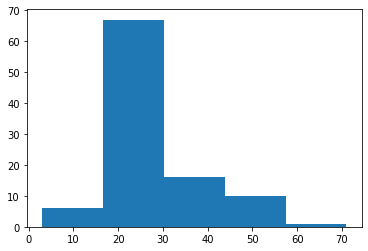

mean value for number of iterations:


28.71

In [ ]:
import matplotlib.pyplot as plt
step_size = list()
for i in range(100):
    n = 7
    robot_position = np.random.choice([i for i in range(1,n-1)], size=(1, 2))[0]
    robot_position = find_station(n,robot_position,1000000)
    step,_ =modal_based_agent(n,robot_position, 1000000)
    step_size.append(step)
step_size = [i for i in step_size if i < 999999999]
plt.hist(step_size, bins=5)
plt.show()

print('mean value for number of iterations:')
np.mean(step_size)
    

## model based without obstacle, 10x10 environment

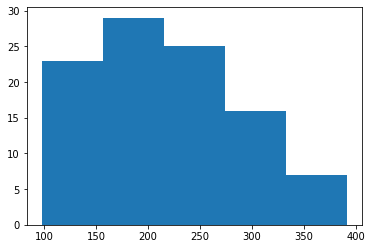

mean value for number of iterations:


216.36

In [ ]:
import matplotlib.pyplot as plt
step_size = list()
for i in range(100):
    n = 12
    robot_position = np.random.choice([i for i in range(1,n-1)], size=(1, 2))[0]
    robot_position = find_station(n,robot_position,1000000)
    step,_ =modal_based_agent(n,robot_position, 1000000)
    step_size.append(step)
step_size = [i for i in step_size if i < 999999999]
plt.hist(step_size, bins=5)
plt.show()

print('mean value for number of iterations:')
np.mean(step_size)
    

## Model Based 100x100 environment

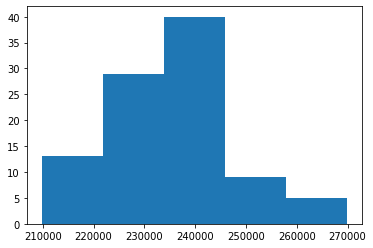

mean value for number of iterations:


235830.375

In [ ]:
import matplotlib.pyplot as plt
step_size = list()
for i in range(100):
    n = 102
    robot_position = np.random.choice([i for i in range(1,n-1)], size=(1, 2))[0]
    robot_position = find_station(n,robot_position,1000000)
    step,_ =modal_based_agent(n,robot_position, 1000000)
    step_size.append(step)
step_size = [i for i in step_size if i < 500000]
plt.hist(step_size, bins=5)
plt.show()

print('mean value for number of iterations:')
np.mean(step_size)
    

Fill out the following table with the average performance measure for 100 random runs (you may also create this table with code):

| Size     | Randomized Agent | Simple Reflex Agent | Model-based Reflex Agent |
|----------|------------------|---------------------|--------------------------|
| 5x5     |400.16 |114.2 |28.71|
| 10x10   |2982.32 |958.23 |216.36 |
| 100x100 |841031.62 |349550.73 |235830.375 |


In [ ]:
import matplotlib.pyplot as plt
step_size_random=list()
n=7
for i in range(100):
    step=simple_environment(n,simple_randomized_agent, max_steps = 1500)
    #print(step)
    step_size_random.append(step)
step_size_reflex = [i for i in step_size_random if i < 999999999999999999]
#plt.hist(step_size_random, bins=5)
#plt.show()

#print('mean value for number of iterations:')
#np.mean(step_size_random)

In [ ]:
import matplotlib.pyplot as plt
step_size_reflex=list()
n=7
for i in range(100):
    step=simple_environment_2(n,simple_agent, max_steps = 500)
    #print(step)
    step_size_reflex.append(step)
step_size_reflex = [i for i in step_size_reflex if i < 999999999999999999]
#plt.hist(step_size, bins=5)
#plt.show()

#print('mean value for number of iterations:')


In [ ]:
import matplotlib.pyplot as plt
step_size = list()
for i in range(100):
    bumpers = {"north" : False, "east" : False, "south" : False, "west" : False, "suck" : False }
    n = 7
    robot_position = np.random.choice([i for i in range(1,n-1)], size=(1, 2))[0]
    robot_position = find_station(n,robot_position,1000000)
    step,_ =modal_based_agent(n,robot_position, 1000000)
    step_size.append(step)
step_size = [i for i in step_size if i < 1000]
#plt.hist(step_size, bins=5)
#plt.show()

#print('mean value for number of iterations:')
#np.mean(step_size)
    

(array([ 7., 19., 31., 16., 13.,  7.,  4.,  1.,  1.,  1.]),
 array([1.0000e+00, 1.4630e+02, 2.9160e+02, 4.3690e+02, 5.8220e+02,
        7.2750e+02, 8.7280e+02, 1.0181e+03, 1.1634e+03, 1.3087e+03,
        1.4540e+03]),
 <a list of 10 Patch objects>)

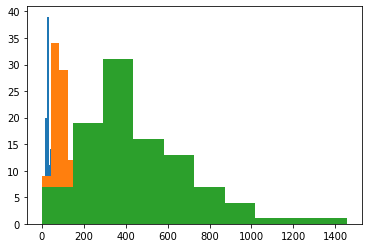

In [ ]:
plt.hist(step_size, bins=10)
plt.hist(step_size_reflex, bins=10)
plt.hist(step_size_random, bins=10)


In [ ]:
import seaborn as sns

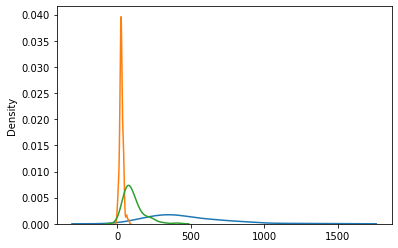

In [ ]:
sns.kdeplot(step_size_random)
sns.kdeplot(step_size)
sns.kdeplot(step_size_reflex)

## Task 5: Robustness of the agent implementations [10 Points] 

Describe how **your agent implementations** will perform 

* if it is put into a rectangular room with unknown size, 
* if the cleaning area can have an iregular shape (e.g., a hallway connecting two rooms), or 
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).

 
**Discussion**

Performance of random agent will be extremely poor as expected.
Simple agent will perform better since it can understand if there is a wall in its neighbor or dirt in its location. However, the movement is still random.
We can expect higly poor performances for these 2 models.

Model based agent will perform better since it knows where it is and assigns a negative reward value to the locations it has been before. It will dramatically increase performance the performance. 

An algorithm can be written so that robot first walks through the wall. Let's consider a L shape room. When moving with the wall, wall can disappear suddenly.In this case, rather than random or memory oriented action, agent can go throgh the previous wall direction. With this, robot can go through all the walls of the environment.


Obstacle case will be investigated right below:


One thing to consider is also when adding random obstacles and random robot position, robot can't decide where to go an exit with an error. We can add an actions such as "stop" so that robot close itself if there is no available actions.

## Graduate student advanced task: Obstacles [10 Points]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus Points].

1. Change your simulation environment tor run experiments for the following problem: Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. Observe how this changes the performance of the three implementations.

2. Describe what would need to be done to perform better with obstacles. Add code if you can. 

**RANDOM AGENT WITH OBSTACLE**

I changed how the environment array is defined and add values (2). They represent the obstacles

In [ ]:
import numpy as np

#delta represents the displacement value. for every action, displacement value is changed

def simple_randomized_agent():
    actions = ["north", "east", "west", "south", "suck"]
    chosen_Act = np.random.choice(actions)
    if chosen_Act == 'north':
        delta = [-1,0]
    if chosen_Act == 'east':
        delta = [0,1]
    if chosen_Act == 'west':
        delta = [0,-1]
    if chosen_Act == 'south':
        delta = [1,0]  
    if chosen_Act == 'suck':
        delta = [0,0]
    return np.array(delta), chosen_Act
    
def simple_environment(n,agent, max_steps, bumpers = {"north" : False, "east" : False, "south" : False, "west" : False, "dirt" : False }):
    robot_position = np.random.choice([i for i in range(1,n-1)], size=(1, 2))[0]
    environment=np.random.choice(3, size=(n, n), p=[0.7, 0.2, 0.1])
    #value 2 should be replaced to 3 if there is any obstacle in the environment and another possibility value should be added.
    
    #3 represents the walls. First and last column and rows of the environment matrix will be all 3.
    environment[0] = [3 for i in range(n)]
    environment[n-1] = [3 for i in range(n)]
    environment[:,0] = [3 for i in range(n)]
    environment[:,n-1]=[3 for i in range(n)]
    #print("First Position of the robot:")
    #print(robot_position)
    #print(robot_position)
    # south_con, north_con, west_con, east_con = robot_position[0] == 4, 
    
    for i in range(max_steps): 
      #Defines sensors for the environment. Bumpers will see the walls(3) and obstacles(2) if there is any.
      #This case there are only walls. Dirt sensor is defined inside bumpers matrix and represented
      #as one 
        if robot_position[0] == n-2: bumpers["south"] = True
        if robot_position[0] != n-2: bumpers["south"] = False 
        if robot_position[1] == n-2: bumpers["east"] = True
        if robot_position[1] != n-2: bumpers["east"] = False
        if robot_position[1] == 1: bumpers["west"] = True
        if robot_position[1] != 1: bumpers["west"] = False
        if robot_position[0] == 1: bumpers["north"] = True
        if robot_position[0] != 1: bumpers["north"] = False
        if environment[robot_position[0]-1][robot_position[1]]==2:bumpers["north"]=True
        if environment[robot_position[0]][robot_position[1]+1]==2:bumpers["east"]=True
        if environment[robot_position[0]+1][robot_position[1]]==2:bumpers["south"]=True
        if environment[robot_position[0]][robot_position[1]-1]==2:bumpers["north"]=True
        if environment[robot_position[0]][robot_position[1]]==1: bumpers["dirt"]=True
        if environment[robot_position[0]][robot_position[1]]==0: bumpers["dirt"]=False
        delta, act = agent()
        #print(robot_position, act)
        if act=='suck':
           environment[robot_position[0]][robot_position[1]]=0
        else:
           environment=environment
        if (bumpers["north"] == True) and (act == 'north'):
            robot_position = robot_position
        elif (bumpers["south"] == True) and (act == 'south'):
            robot_position = robot_position
        elif (bumpers["east"] == True) and (act == 'east'):
            robot_position = robot_position 
        elif (bumpers["west"] == True) and (act == 'west'):
            robot_position = robot_position 
        else:
            robot_position = robot_position + delta
      
        print("Number of iteration:")
        print(i+1)
        print("position of robot:")
        print(robot_position)
        print("Action taken:")
        print(act)
        print("Environment status after the action")
        print(environment)
        print(bumpers)
        #if the environment is clean, break the loop.
        if 1 not in environment:
            break
#returns the total action required.
    return i+1

In [ ]:
import numpy as np
n=7
simple_environment(n,simple_randomized_agent, max_steps = 5)


Number of iteration:
1
position of robot:
[2 1]
Action taken:
west
Environment status after the action
[[3 3 3 3 3 3 3]
 [3 0 0 0 0 1 3]
 [3 0 1 2 0 0 3]
 [3 0 0 0 0 0 3]
 [3 0 0 2 0 1 3]
 [3 0 0 0 2 0 3]
 [3 3 3 3 3 3 3]]
{'north': False, 'east': False, 'south': False, 'west': True, 'dirt': False}
Number of iteration:
2
position of robot:
[3 1]
Action taken:
south
Environment status after the action
[[3 3 3 3 3 3 3]
 [3 0 0 0 0 1 3]
 [3 0 1 2 0 0 3]
 [3 0 0 0 0 0 3]
 [3 0 0 2 0 1 3]
 [3 0 0 0 2 0 3]
 [3 3 3 3 3 3 3]]
{'north': False, 'east': False, 'south': False, 'west': True, 'dirt': False}
Number of iteration:
3
position of robot:
[3 1]
Action taken:
west
Environment status after the action
[[3 3 3 3 3 3 3]
 [3 0 0 0 0 1 3]
 [3 0 1 2 0 0 3]
 [3 0 0 0 0 0 3]
 [3 0 0 2 0 1 3]
 [3 0 0 0 2 0 3]
 [3 3 3 3 3 3 3]]
{'north': False, 'east': False, 'south': False, 'west': True, 'dirt': False}
Number of iteration:
4
position of robot:
[2 1]
Action taken:
north
Environment status after the ac

5

In [ ]:
def simple_environment(n,agent, max_steps, bumpers = {"north" : False, "east" : False, "south" : False, "west" : False, "dirt" : False }):
    robot_position = np.random.choice([i for i in range(1,n-1)], size=(1, 2))[0]
    environment=np.random.choice(3, size=(n, n), p=[0.7, 0.2, 0.1])
    #value 2 should be replaced to 3 if there is any obstacle in the environment and another possibility value should be added.
    
    #3 represents the walls. First and last column and rows of the environment matrix will be all 3.
    environment[0] = [3 for i in range(n)]
    environment[n-1] = [3 for i in range(n)]
    environment[:,0] = [3 for i in range(n)]
    environment[:,n-1]=[3 for i in range(n)]
    #print("First Position of the robot:")
    #print(robot_position)
    #print(robot_position)
    # south_con, north_con, west_con, east_con = robot_position[0] == 4, 
    
    for i in range(max_steps): 
      #Defines sensors for the environment. Bumpers will see the walls(3) and obstacles(2) if there is any.
      #This case there are only walls. Dirt sensor is defined inside bumpers matrix and represented
      #as one 
        if robot_position[0] == n-2: bumpers["south"] = True
        if robot_position[0] != n-2: bumpers["south"] = False 
        if robot_position[1] == n-2: bumpers["east"] = True
        if robot_position[1] != n-2: bumpers["east"] = False
        if robot_position[1] == 1: bumpers["west"] = True
        if robot_position[1] != 1: bumpers["west"] = False
        if robot_position[0] == 1: bumpers["north"] = True
        if robot_position[0] != 1: bumpers["north"] = False
        if environment[robot_position[0]-1][robot_position[1]]==2:bumpers["north"]=True
        if environment[robot_position[0]][robot_position[1]+1]==2:bumpers["east"]=True
        if environment[robot_position[0]+1][robot_position[1]]==2:bumpers["south"]=True
        if environment[robot_position[0]][robot_position[1]-1]==2:bumpers["north"]=True
        if environment[robot_position[0]][robot_position[1]]==1: bumpers["dirt"]=True
        if environment[robot_position[0]][robot_position[1]]==0: bumpers["dirt"]=False
        delta, act = agent()
        #print(robot_position, act)
        if act=='suck':
           environment[robot_position[0]][robot_position[1]]=0
        else:
           environment=environment
        if (bumpers["north"] == True) and (act == 'north'):
            robot_position = robot_position
        elif (bumpers["south"] == True) and (act == 'south'):
            robot_position = robot_position
        elif (bumpers["east"] == True) and (act == 'east'):
            robot_position = robot_position 
        elif (bumpers["west"] == True) and (act == 'west'):
            robot_position = robot_position 
        else:
            robot_position = robot_position + delta
      
        #print("Number of iteration:")
        #print(i+1)
        #print("position of robot:")
        #print(robot_position)
        #print("Action taken:")
        #print(act)
        #print("Environment status after the action")
        #print(environment)
        #print(bumpers)
        #if the environment is clean, break the loop.
        if 1 not in environment:
            break
#returns the total action required.
    return i+1

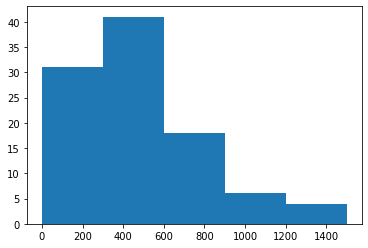

mean value for number of iterations:


480.61

In [ ]:
import matplotlib.pyplot as plt
step_size_random=list()
n=7
for i in range(100):
    step=simple_environment(n,simple_randomized_agent, max_steps = 1500)
    #print(step)
    step_size_random.append(step)
step_size_reflex = [i for i in step_size_random if i < 4000]
plt.hist(step_size_random, bins=5)
plt.show()

print('mean value for number of iterations:')
np.mean(step_size_random)

RANDOM AGENT PERFORMANCE DROPPED WITH THE OBSTACLE ENVIRONMENT

**SIMPLE REFLEX AGENT WITH OBSTACLES**

In [ ]:
#RANDOM ENVIRONMENT CHOICE IS CHANGED AND OBSTACLES WERE ADDED (2 VALUES IN ENVIRONMENT MATRIX)

In [ ]:
def simple_environment_2(n,agent, max_steps, bumpers = {"north" : False, "east" : False, "south" : False, "west" : False, "dirt" : False }):
    robot_position = np.random.choice([i for i in range(1,n-1)], size=(1, 2))[0]
    environment=np.random.choice(3, size=(n, n), p=[0.7, 0.2, 0.1])
    environment[0] = [3 for i in range(n)]
    environment[n-1] = [3 for i in range(n)]
    environment[:,0] = [3 for i in range(n)]
    environment[:,n-1]=[3 for i in range(n)]
    #print("First Position of the robot:")
    #print(robot_position)
  #print(robot_position)
   # south_con, north_con, west_con, east_con = robot_position[0] == 4, 
    
    for i in range(max_steps): 
      #define environmental obstacles. For this case, bumpers will only see the
      #walls. Dirt sensor is also defined here.
        #reward_space[robot_position[0]+1][robot_position[1]+1]=reward_space[robot_position[0]][robot_position[1]]+1
        if robot_position[0] == n-2: bumpers["south"] = True
        if robot_position[0] != n-2: bumpers["south"] = False 
        if robot_position[1] == n-2: bumpers["east"] = True
        if robot_position[1] != n-2: bumpers["east"] = False
        if robot_position[1] == 1: bumpers["west"] = True
        if robot_position[1] != 1: bumpers["west"] = False
        if robot_position[0] == 1: bumpers["north"] = True
        if robot_position[0] != 1: bumpers["north"] = False
        if environment[robot_position[0]-1][robot_position[1]]==2:bumpers["north"]=True
        if environment[robot_position[0]][robot_position[1]+1]==2:bumpers["east"]=True
        if environment[robot_position[0]+1][robot_position[1]]==2:bumpers["south"]=True
        if environment[robot_position[0]][robot_position[1]-1]==2:bumpers["north"]=True


        if environment[robot_position[0]][robot_position[1]]==1: bumpers["dirt"]=True
        if environment[robot_position[0]][robot_position[1]]==0: bumpers["dirt"]=False
        act = agent(bumpers)
        if act == 'east':
          delta = [0,1]
        if act == 'west':
          delta = [0,-1]
        if act == 'south':
          delta = [1,0]  
        if act == 'suck':
          delta = [0,0]
        if act == 'north':
          delta = [-1,0]
        #print(robot_position, act)
        if act=='suck':
           environment[robot_position[0]][robot_position[1]]=0
        else:
           environment=environment
        if (bumpers["north"] == True) and (act == 'north'):
            robot_position = robot_position
        elif (bumpers["south"] == True) and (act == 'south'):
            robot_position = robot_position
        elif (bumpers["east"] == True) and (act == 'east'):
            robot_position = robot_position 
        elif (bumpers["west"] == True) and (act == 'west'):
            robot_position = robot_position 
        else:
            robot_position = robot_position + delta
      
        #print("Number of iteration:")
        #print(i+1)
        #print(bumpers)
        #print("Action taken:")
        #print(act)
        #print("position of robot:")
        #print(robot_position)
        #print("Environment status after the action")
        #print(environment)
        
        #print(reward_space)
        #if the environment is clean, break the loop.
        if 1 not in environment:
            break
        
    return i+1

Simple Agent 5X5 Environment

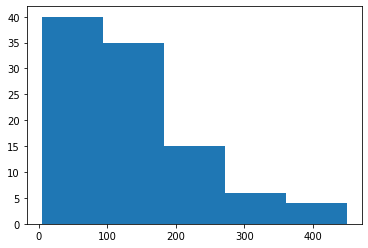

mean value for number of iterations:


137.76

In [ ]:
import matplotlib.pyplot as plt
step_size=list()
n=7
for i in range(100):
    step=simple_environment_2(n,simple_agent, max_steps = 500)
    #print(step)
    step_size.append(step)
step_size_reflex = [i for i in step_size if i < 999999999999999999]
plt.hist(step_size, bins=5)
plt.show()

print('mean value for number of iterations:')
np.mean(step_size)

IT SHOWS SLIGHTLY LESS PERFORMANCE IN THE OBSTACLE ENVIRONMENT.

**MODEL BASED AGENT WITH OBSTACLES:**

In [ ]:
#Define Obstacles. Since I already implemented that sensors will recognized obstacles in environment array (2 values), there is no need to change anything in agent part.

In [ ]:
# Your code and description goes here

bumpers = {"north" : False, "east" : False, "south" : False, "west" : False, "suck" : False }
    
def find_station(n,robot_position,max_steps):
    chosen_Act = 'north'
    for i in range(max_steps):
        # sensors sensing
        if robot_position[0] == n-2: bumpers["south"] = True
        if robot_position[0] != n-2: bumpers["south"] = False 
        if robot_position[1] == n-2: bumpers["east"] = True
        if robot_position[1] != n-2: bumpers["east"] = False
        if robot_position[1] == 1: bumpers["west"] = True
        if robot_position[1] != 1: bumpers["west"] = False
        if robot_position[0] == 1: bumpers["north"] = True
        if robot_position[0] != 1: bumpers["north"] = False
        # rationalizing action
        if bumpers[chosen_Act] == True: 
            chosen_Act = 'west' 
        else: 
            chosen_Act = chosen_Act
        if bumpers[chosen_Act] == True:
            #print('arrived at north-west corner')
            #print('saving position as (0,0) to memory')
            memory_position = robot_position
            break
        # act upon chosen action
        if chosen_Act == 'east':
            delta = [0,1]
        if chosen_Act == 'west':
            delta = [0,-1]
        if chosen_Act == 'south':
            delta = [1,0]  
        if chosen_Act == 'suck':
            delta = [0,0]
        if chosen_Act == 'north':
            delta = [-1,0]         
        # changed position
        robot_position = robot_position + delta
        #print(robot_position)
    return robot_position

#env = np.random.choice(2, size=(n-2, n-2), p=[0.8, 0.2])

def reward_based_movement(robot_position, reward_space, actions):
    # put this after possible actions are determined by bumpers!
    # robot_position = [0, 0]
    # actions = {"east" : [0,1], "south" : [1,0]}
    p_pos, p_reward = list(), list()
    p_delta = [j for i,j in actions.items()]
    for i in range(len(p_delta)):
        p_pos.append(np.array(robot_position) + p_delta[i])
        p_reward.append(reward_space[p_pos[-1][0]][p_pos[-1][1]])
    idx = p_reward.index(min(p_reward)) # find index of the low reward direction
    act = list(actions.keys())[idx]
    #print(chosen_Act) 
    #print(reward_space)
    return act

def modal_based_agent(n, robot_position, max_steps):
    #env = np.random.choice(3, size=(7, 7), p=[0.8, 0.2])
    env=np.random.choice(3, size=(n, n), p=[0.7, 0.2, 0.1])
    env[0] = [3 for i in range(n)]
    env[n-1] = [3 for i in range(n)]
    env[:,0] = [3 for i in range(n)]
    env[:,n-1]=[3 for i in range(n)]
    print('First Environment')
    print(env)
    robot_position_array = list()
    reward_space = np.zeros(shape = (n,n))
    #print('This is the environment matrix:')
    #print(env)
    for i in range(max_steps):
        # return back all possiblities.
        actions = {"north" : [-1,0] , "east": [0,1], "west" : [0,-1], "south" : [1, 0]}
        reward_space[robot_position[0]][robot_position[1]]=reward_space[robot_position[0]][robot_position[1]]+1
        #print(robot_position)
        # sensors sensing
        if robot_position[0] == n-2: bumpers["south"] = True
        if robot_position[0] != n-2: bumpers["south"] = False 
        if robot_position[1] == n-2: bumpers["east"] = True
        if robot_position[1] != n-2: bumpers["east"] = False
        if robot_position[1] == 1: bumpers["west"] = True
        if robot_position[1] != 1: bumpers["west"] = False
        if robot_position[0] == 1: bumpers["north"] = True
        if robot_position[0] != 1: bumpers["north"] = False

       
        # Obstacle func.  
        if env[robot_position[0]-1][robot_position[1]]==2:bumpers["north"]=True
        if env[robot_position[0]][robot_position[1]+1]==2:bumpers["east"]=True
        if env[robot_position[0]+1][robot_position[1]]==2:bumpers["south"]=True
        if env[robot_position[0]][robot_position[1]-1]==2:bumpers["west"]=True
        if env[robot_position[0]][robot_position[1]]==1: bumpers["suck"]=True
        if env[robot_position[0]][robot_position[1]]==0: bumpers["suck"]=False

        
        # eliminate irrational choices to determine the action: # POSSIBLE ERROR: it can't remove the same thing twice.        
        if bumpers["suck"] == True: 
            chosen_Act = 'suck'
            #print('sucking')
        else:
            if bumpers['south'] ==  True: del actions['south']  # actions.remove('south')
            if bumpers['east'] ==  True:  del actions['east']   # actions.remove('east')
            if bumpers['west'] ==  True:  del actions['west']   # actions.remove('west')
            if bumpers['north'] ==  True: del actions['north']  # actions.remove('north')
        
        # Choosing rational action        
            if i == 0: 
                chosen_Act = np.random.choice(list(actions.keys()))
                #print('first step')  # first action is total random chosen from possible paths.
            elif bumpers[chosen_Act] == True: 
                #print('we are at wall: ',robot_position)
                chosen_Act = reward_based_movement(robot_position,reward_space, actions) #reward_based_movement
            elif chosen_Act == 'suck': 
                #print(actions)
                chosen_Act = reward_based_movement(robot_position,reward_space, actions)
                #print('cleaned: ', robot_position)
            else: 
                chosen_Act = reward_based_movement(robot_position,reward_space, actions)
                #print('else condition. pure reward based')
            
        
        # act upon chosen action
        if chosen_Act == 'east':
            delta = [0,1]
        if chosen_Act == 'west':
            delta = [0,-1]
        if chosen_Act == 'south':
            delta = [1,0]  
        if chosen_Act == 'suck':
            delta = [0,0]
        if chosen_Act == 'north':
            delta = [-1,0]            
        if chosen_Act == 'suck':
            env[robot_position[0]][robot_position[1]]=0
        else:
            env=env

        #if the environment is clean, break the loop.
        #if not np.any(env):
        if 1 not in env:
            print('Environment is clean:', i+1,'steps')
            print(env)
            break
        
        # Moving to new position
        robot_position = robot_position + delta
        robot_position_array.append(robot_position)
        #print(reward_space) 
        
    return i+1, reward_space          

In [ ]:
 
n=7 
robot_position = np.random.choice([i for i in range(1,n-1)], size=(1, 2))[0]
robot_position = find_station(n,robot_position,1000000)
step,_ =modal_based_agent(n,robot_position, 1000000)


First Environment
[[3 3 3 3 3 3 3]
 [3 0 0 2 0 0 3]
 [3 1 0 0 0 2 3]
 [3 2 0 1 0 0 3]
 [3 2 0 0 2 1 3]
 [3 0 0 0 0 0 3]
 [3 3 3 3 3 3 3]]
Environment is clean: 30 steps
[[3 3 3 3 3 3 3]
 [3 0 0 2 0 0 3]
 [3 0 0 0 0 2 3]
 [3 2 0 0 0 0 3]
 [3 2 0 0 2 0 3]
 [3 0 0 0 0 0 3]
 [3 3 3 3 3 3 3]]


In [ ]:
import matplotlib.pyplot as plt
step_size = list()
for i in range(100):
    n = 7
    robot_position = np.random.choice([i for i in range(1,n-1)], size=(1, 2))[0]
    robot_position = find_station(n,robot_position,1000000)
    step,_ =modal_based_agent(n,robot_position, 1000000)
    step_size.append(step)
    

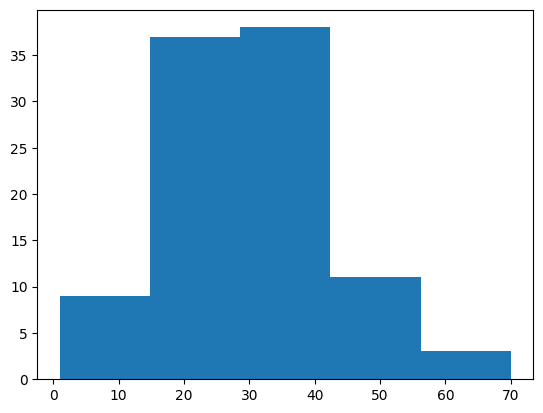

mean value for number of iterations:


30.20408163265306

In [ ]:
step_size = [i for i in step_size if i < 700000]
plt.hist(step_size, bins=5)
plt.show()

print('mean value for number of iterations:')
np.mean(step_size)

MODEL AGENT SHOWS SLIGHTLY LESS PERFORMANCE IN THE OBSTACLE ENVIRONMENT.

## More advanced implementation tasks

* __Agent for and environment with obstacles:__ Implement an agent for an environment where the agent does not know how large the environment is (we assume it is rectangular), where it starts or where the obstacles are. An option would be to always move to the closest unchecked/uncleaned square (note that this is actualy depth-first search).

* __Utility-based agent:__ Change the environment for a $5 \times 5$ room, so each square has a fixed probability of getting dirty again. For the implementation, we give the environment a 2-dimensional array of probabilities. The utility of a state is defined as the number of currebntly clean squares in the room. Implement a utility-based agent that maximizes the expected utility over one full charge which lasts for 100000 time steps. To do this, the agent needs to learn the probabilities with which different squares get dirty again. This is very tricky!

In [ ]:
# The negative rewward implemented for this homework should not be used if points can go dirty again. A possible case solution would be  
#go thorugh all the room, then go to reverse positions and clean the dirts.
#Learning of probablitites can be achieved this way.